#### Note

For this to work ensure that:

1. The class labels are encoded as numeric values (0,1,2 ...)
2. The data is normalized (between 0-1)
3. The labels are categorical. This KNN does not work on continouus values
4. The distance is measured via euclidean distance which can not be changed for now

In [481]:
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [482]:
def euclideanDistanceMatrix(input_space, data_point):
    dist = pow((input_space - data_point),2)
    dist = np.sum(dist, axis=1)
    dist = np.sqrt(dist)
    return dist.argsort()

In [483]:
def majority_vote(distance_matrix, y_train, k):
    label=[]
    for x in range(k):
        label.append(y_train[distance_matrix[x]])
    counts = np.bincount(label)
    return np.argmax(counts)

In [484]:
def knn(input_space, input_labels, X_test, k=3):
    y_predict = []
    for data_point in X_test:
        indicies = euclideanDistanceMatrix(input_space, data_point)
        label = majority_vote(indicies, input_labels, k)
        y_predict.append(label)
    return y_predict

In [485]:
def indicator_loss(y_test, y_predict):
    n_missclassified = 0
    for idx, elem in enumerate(y_test):
        if elem == y_predict[idx]:
            n_missclassified +=1
    return n_missclassified

#### Generate test data

In [486]:
np.random.seed()
input_space =  np.random.rand(40,2)
input_labels =  np.random.randint(2, size=40)

X_test = np.random.rand(20,2)
y_test = np.random.randint(2, size=20)

#### Use knn to predict test-labels

In [487]:
y_predict = knn(input_space, input_labels, X_test, k=3)

#### Calculate indicator loss

In [488]:
indicator_loss(y_test, y_predict)

10

#### Visualization

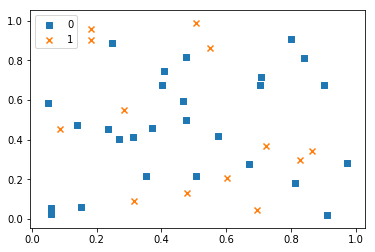

In [489]:
## Plot input_space and input labels

markers = ['s', 'x']
for idx, cl in enumerate(np.unique(input_labels)):
    plt.scatter(x=input_space[input_labels==cl, 0], y=input_space[input_labels==cl, 1],
               marker=markers[idx], label=cl)
    
plt.legend(loc='upper left')

plt.show()


##### Show decision boundaries

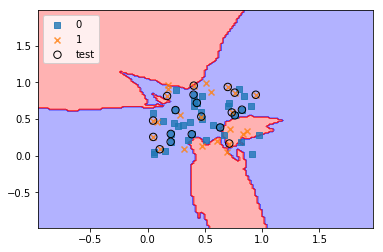

In [490]:
# get combined datasets
X_combined = np.vstack((input_space, X_test))
y_combined = np.hstack((input_labels, y_test))

# setup marker generator and color map
markers = ('s', 'x', 'o', '^', 'v')
colors = ('blue', 'red', 'lightgreen', 'gray', 'cyan')
cmap = ListedColormap(colors[:len(np.unique(y_predict))])

# plot the decision surface
x1_min, x1_max = X_combined[:, 0].min() - 1, X_combined[:, 0].max() + 1
x2_min, x2_max = X_combined[:, 1].min() - 1, X_combined[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                           np.arange(x2_min, x2_max, 0.02))
mesh_test = np.array([xx1.ravel(), xx2.ravel()]).T
Z = knn(input_space=input_space, input_labels=input_labels, X_test=mesh_test, k=5)
Z = np.array(Z)
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())

# plot class samples
for idx, cl in enumerate(np.unique(y_combined)):
    plt.scatter(x=X_combined[y_combined==cl, 0], y=X_combined[y_combined==cl, 1],
               marker=markers[idx], label=cl, alpha=0.8, cmap=cmap(idx))

# Mark test data
plt.scatter(X_test[:, 0], X_test[:,1], c='', alpha=1.0, linewidths=1, marker='o', edgecolor='black', s=55, label='test')

plt.legend(loc='upper left')
plt.show()

#### compare k to indicator-loss function

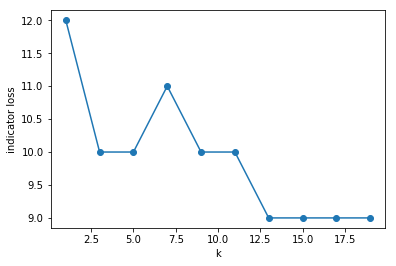

In [491]:
losses = []
for k in range(1,21, 2):
    y_predict = knn(input_space=input_space, input_labels=input_labels, X_test=X_test, k=k)
    loss = indicator_loss(y_test=y_test, y_predict=y_predict)
    losses.append(loss)
plt.plot(range(1,20, 2) , losses, marker='o')
plt.xlabel('k')
plt.ylabel('indicator loss')
plt.show()